<a href="https://colab.research.google.com/github/IvarP3/Proyecto-IO/blob/main/Proyecto_io.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Método grafico en Python**

**EJEMPLO 1**

Solución óptima: x1 = 2.00, x2 = 8.00
Valor máximo de la función objetivo: Z = 74.00


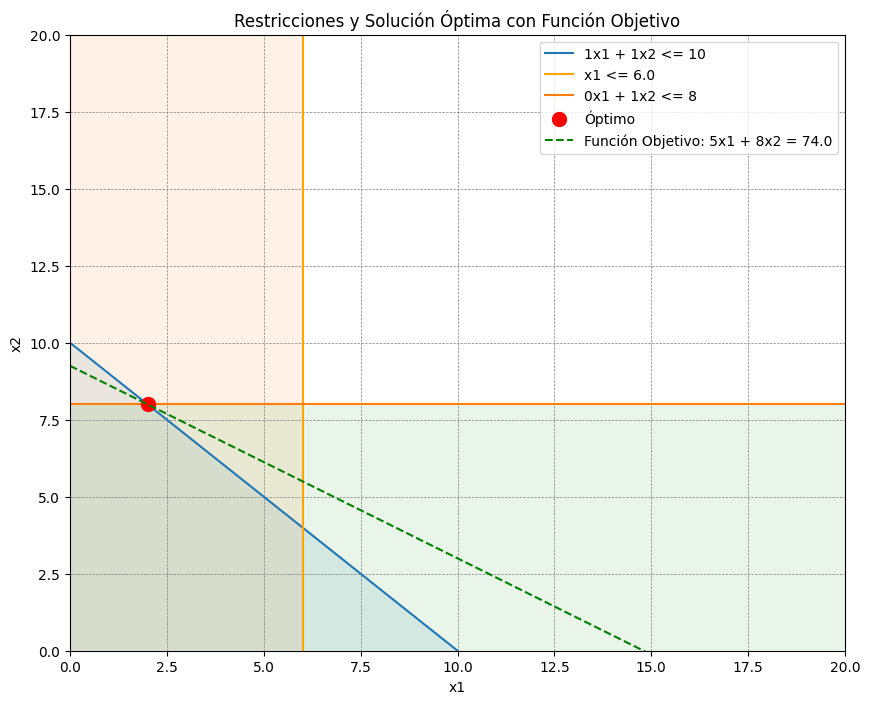

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog
def resolver_y_graficar_con_funcion_objetivo(A, b, c, restricciones, x1_bounds=(0, None), x2_bounds=(0, None)):
    """
    Resuelve y grafica problemas de programación lineal con restricciones de tipo <=, >=, =,
    y grafica la función objetivo basada en los valores óptimos encontrados.

    :param A: Matriz de coeficientes de las restricciones.
    :param b: Vector de constantes del lado derecho de las restricciones.
    :param c: Vector de coeficientes de la función objetivo.
    :param restricciones: Lista de tipos de restricciones ('<=', '>=', '=').
    :param x1_bounds: Límite inferior y superior para x1.
    :param x2_bounds: Límite inferior y superior para x2.
    """
    x1 = np.linspace(0, 100, 1000)  # Rango para graficar x1
    x2 = np.linspace(0, 100, 1000)  # Rango para graficar x2
    plt.figure(figsize=(10, 8))

    # Variables auxiliares para restricciones
    A_ub, b_ub, A_eq, b_eq = [], [], [], []

    # Procesar las restricciones
    for i in range(len(restricciones)):
        if restricciones[i] == '<=':
            A_ub.append(A[i])
            b_ub.append(b[i])
            if A[i][1] != 0:  # Restricción no horizontal
                y = (b[i] - A[i][0] * x1) / A[i][1]
                plt.plot(x1, y, label=f'{A[i][0]}x1 + {A[i][1]}x2 <= {b[i]}', linestyle='-')
                plt.fill_between(x1, 0, y, where=(y >= 0), alpha=0.1)
            else:  # Restricción vertical (x1 = constante)
                x_vert = np.full_like(x2, b[i] / A[i][0])
                plt.plot(x_vert, x2, color='orange', linestyle='-', label=f'x1 <= {b[i] / A[i][0]}')
                plt.fill_betweenx(x2, 0, x_vert, where=(x_vert >= 0), alpha=0.1)
        elif restricciones[i] == '>=':
            A_ub.append(-np.array(A[i]))
            b_ub.append(-b[i])
            if A[i][1] != 0:  # Restricción no horizontal
                y = (b[i] - A[i][0] * x1) / A[i][1]
                plt.plot(x1, y, label=f'{A[i][0]}x1 + {A[i][1]}x2 >= {b[i]}', linestyle='-')
                plt.fill_between(x1, y, 100, where=(y >= 0), alpha=0.1)
            else:  # Restricción vertical (x1 = constante)
                x_vert = np.full_like(x2, b[i] / A[i][0])
                plt.plot(x_vert, x2, color='orange', linestyle='-', label=f'x1 >= {b[i] / A[i][0]}')
                plt.fill_betweenx(x2, x_vert, 100, where=(x_vert >= 0), alpha=0.1)
        elif restricciones[i] == '=':
            A_eq.append(A[i])
            b_eq.append(b[i])
            if A[i][1] != 0:  # Restricción no horizontal
                y = (b[i] - A[i][0] * x1) / A[i][1]
                plt.plot(x1, y, '--', label=f'{A[i][0]}x1 + {A[i][1]}x2 = {b[i]}')
            else:  # Restricción vertical (x1 = constante)
                x_vert = np.full_like(x2, b[i] / A[i][0])
                plt.plot(x_vert, x2, '--', label=f'x1 = {b[i] / A[i][0]}')

    # Convertir las restricciones en arrays
    A_ub = np.array(A_ub) if A_ub else None
    b_ub = np.array(b_ub) if b_ub else None
    A_eq = np.array(A_eq) if A_eq else None
    b_eq = np.array(b_eq) if b_eq else None

    # Resolver el problema
    res = linprog(-c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, bounds=[x1_bounds, x2_bounds], method='highs')

    # Mostrar solución óptima
    if res.success:
        vertice_optimo = res.x
        valor_optimo = -res.fun
        print(f'Solución óptima: x1 = {vertice_optimo[0]:.2f}, x2 = {vertice_optimo[1]:.2f}')
        print(f'Valor máximo de la función objetivo: Z = {valor_optimo:.2f}')

        # Agregar el vértice óptimo al gráfico
        plt.plot(vertice_optimo[0], vertice_optimo[1], 'ro', markersize=10, label='Óptimo')

        # Graficar la función objetivo pasando por el punto óptimo
        if c[1] != 0:  # Función objetivo no vertical
            z_opt = valor_optimo
            y_obj = (z_opt - c[0] * x1) / c[1]
            plt.plot(x1, y_obj, '--', color='green', label=f'Función Objetivo: {c[0]}x1 + {c[1]}x2 = {z_opt}')
        else:  # Función objetivo vertical
            x_obj = z_opt / c[0]
            plt.axvline(x=x_obj, linestyle='--', color='green', label=f'Función Objetivo: x1 = {x_obj}')
    else:
        print("No se encontró una solución factible.")

    # Configuración del gráfico
    plt.xlim(0, 20)
    plt.ylim(0, 20)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Restricciones y Solución Óptima con Función Objetivo')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.show()

# Ejemplo de uso
c = np.array([5, 8]) # Vector c de coeficientes de la funcion objetivo
# Matriz A de coeficientes de las restricciones
A = np.array([[1, 1],
              [1, 0],
              [0, 1]])
restricciones = ['<=', '<=', '<='] # tipo de restricciones
#vector b de las restricciones
b = np.array([10,
              6,
              8])

resolver_y_graficar_con_funcion_objetivo(A, b, c, restricciones)


**EJEMPLO 2**

Solución óptima: x1 = 11.33, x2 = 13.00
Valor máximo de la función objetivo: Z = 131.33


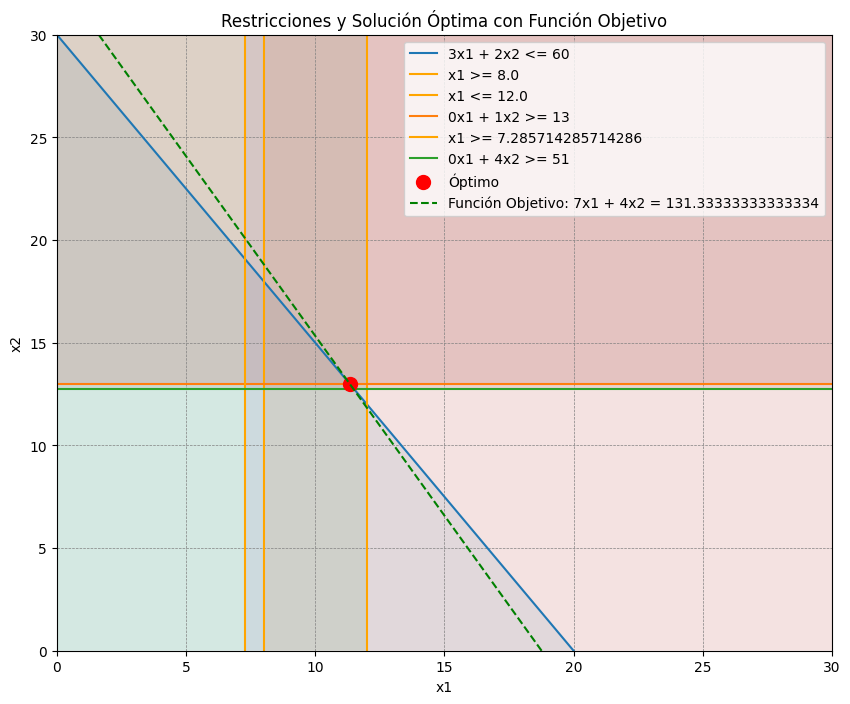

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog
def resolver_y_graficar_con_funcion_objetivo(A, b, c, restricciones, x1_bounds=(0, None), x2_bounds=(0, None)):
    """
    Resuelve y grafica problemas de programación lineal con restricciones de tipo <=, >=, =,
    y grafica la función objetivo basada en los valores óptimos encontrados.

    :param A: Matriz de coeficientes de las restricciones.
    :param b: Vector de constantes del lado derecho de las restricciones.
    :param c: Vector de coeficientes de la función objetivo.
    :param restricciones: Lista de tipos de restricciones ('<=', '>=', '=').
    :param x1_bounds: Límite inferior y superior para x1.
    :param x2_bounds: Límite inferior y superior para x2.
    """
    x1 = np.linspace(0, 100, 1000)  # Rango para graficar x1
    x2 = np.linspace(0, 100, 1000)  # Rango para graficar x2
    plt.figure(figsize=(10, 8))

    # Variables auxiliares para restricciones
    A_ub, b_ub, A_eq, b_eq = [], [], [], []

    # Procesar las restricciones
    for i in range(len(restricciones)):
        if restricciones[i] == '<=':
            A_ub.append(A[i])
            b_ub.append(b[i])
            if A[i][1] != 0:  # Restricción no horizontal
                y = (b[i] - A[i][0] * x1) / A[i][1]
                plt.plot(x1, y, label=f'{A[i][0]}x1 + {A[i][1]}x2 <= {b[i]}', linestyle='-')
                plt.fill_between(x1, 0, y, where=(y >= 0), alpha=0.1)
            else:  # Restricción vertical (x1 = constante)
                x_vert = np.full_like(x2, b[i] / A[i][0])
                plt.plot(x_vert, x2, color='orange', linestyle='-', label=f'x1 <= {b[i] / A[i][0]}')
                plt.fill_betweenx(x2, 0, x_vert, where=(x_vert >= 0), alpha=0.1)
        elif restricciones[i] == '>=':
            A_ub.append(-np.array(A[i]))
            b_ub.append(-b[i])
            if A[i][1] != 0:  # Restricción no horizontal
                y = (b[i] - A[i][0] * x1) / A[i][1]
                plt.plot(x1, y, label=f'{A[i][0]}x1 + {A[i][1]}x2 >= {b[i]}', linestyle='-')
                plt.fill_between(x1, y, 100, where=(y >= 0), alpha=0.1)
            else:  # Restricción vertical (x1 = constante)
                x_vert = np.full_like(x2, b[i] / A[i][0])
                plt.plot(x_vert, x2, color='orange', linestyle='-', label=f'x1 >= {b[i] / A[i][0]}')
                plt.fill_betweenx(x2, x_vert, 100, where=(x_vert >= 0), alpha=0.1)
        elif restricciones[i] == '=':
            A_eq.append(A[i])
            b_eq.append(b[i])
            if A[i][1] != 0:  # Restricción no horizontal
                y = (b[i] - A[i][0] * x1) / A[i][1]
                plt.plot(x1, y, '--', label=f'{A[i][0]}x1 + {A[i][1]}x2 = {b[i]}')
            else:  # Restricción vertical (x1 = constante)
                x_vert = np.full_like(x2, b[i] / A[i][0])
                plt.plot(x_vert, x2, '--', label=f'x1 = {b[i] / A[i][0]}')

    # Convertir las restricciones en arrays
    A_ub = np.array(A_ub) if A_ub else None
    b_ub = np.array(b_ub) if b_ub else None
    A_eq = np.array(A_eq) if A_eq else None
    b_eq = np.array(b_eq) if b_eq else None

    # Resolver el problema
    res = linprog(-c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, bounds=[x1_bounds, x2_bounds], method='highs')

    # Mostrar solución óptima
    if res.success:
        vertice_optimo = res.x
        valor_optimo = -res.fun
        print(f'Solución óptima: x1 = {vertice_optimo[0]:.2f}, x2 = {vertice_optimo[1]:.2f}')
        print(f'Valor máximo de la función objetivo: Z = {valor_optimo:.2f}')

        # Agregar el vértice óptimo al gráfico
        plt.plot(vertice_optimo[0], vertice_optimo[1], 'ro', markersize=10, label='Óptimo')

        # Graficar la función objetivo pasando por el punto óptimo
        if c[1] != 0:  # Función objetivo no vertical
            z_opt = valor_optimo
            y_obj = (z_opt - c[0] * x1) / c[1]
            plt.plot(x1, y_obj, '--', color='green', label=f'Función Objetivo: {c[0]}x1 + {c[1]}x2 = {z_opt}')
        else:  # Función objetivo vertical
            x_obj = z_opt / c[0]
            plt.axvline(x=x_obj, linestyle='--', color='green', label=f'Función Objetivo: x1 = {x_obj}')
    else:
        print("No se encontró una solución factible.")

    # Configuración del gráfico
    plt.xlim(0, 30)
    plt.ylim(0, 30)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Restricciones y Solución Óptima con Función Objetivo')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.show()

# Ejemplo de uso
c = np.array([7, 4]) # Vector c de coeficientes de la funcion objetivo
# Matriz A de coeficientes de las restricciones
A = np.array([[3, 2],
              [1, 0],
              [1, 0],
              [0, 1],
              [7, 0],
              [0, 4]])
restricciones = ['<=', '>=', '<=','>=', '>=', '>='] # tipo de restricciones
#vector b de las restricciones
b = np.array([60,
              8,
              12,
              13,
              51,
              51])

resolver_y_graficar_con_funcion_objetivo(A, b, c, restricciones)


**EJEMPLO 1 SIMPLEX**

In [ ]:
import numpy as np

def simplex_basico(c, A, b, tipo="max"):
    """
    Método Simplex Básico para maximizar o minimizar problemas de programación lineal.

    :param c: Vector de coeficientes de la función objetivo.
    :param A: Matriz de coeficientes de las restricciones.
    :param b: Vector de constantes del lado derecho de las restricciones.
    :param tipo: Indica si se va a maximizar ("max") o minimizar ("min").
    :return: Solución óptima, valor óptimo de la función objetivo y detalles de cada variable.
    """
    # Convertir a maximización si es necesario
    if tipo == "max":
        c = -c  # Invertir signos para maximización

    # Crear la tabla inicial
    num_variables = len(c)
    num_restricciones = len(b)

    # Agregar variables de holgura
    I = np.eye(num_restricciones)  # Matriz identidad para las variables de holgura
    A = np.hstack([A, I])  # Agregar las variables de holgura a la matriz de restricciones
    c = np.hstack([c, np.zeros(num_restricciones)])  # Extender la función objetivo con coeficientes 0 para las holguras

    # Inicializar la tabla simplex
    tabla = np.hstack([A, b.reshape(-1, 1)])  # Combinar A y b en una tabla
    c_z = np.hstack([c, 0])  # Extender c con el término constante 0

    # Inicializar variables básicas
    variables_basicas = list(range(num_variables, num_variables + num_restricciones))  # Variables de holgura

    # Iterar hasta alcanzar una solución óptima
    while True:
        # Calcular los costos relativos (c_j - z_j)
        z_j = np.dot(c_z[variables_basicas], tabla[:, :-1])
        costos_relativos = c_z[:-1] - z_j

        # Verificar si la solución es óptima
        if all(costos_relativos >= 0):
            break

        # Determinar la variable entrante (más negativo en costos relativos)
        columna_entrante = np.argmin(costos_relativos)

        # Verificar si el problema es no acotado
        if all(tabla[:, columna_entrante] <= 0):
            raise ValueError("El problema es no acotado.")

        # Determinar la variable saliente (prueba de razón mínima)
        razones = np.divide(tabla[:, -1], tabla[:, columna_entrante], out=np.full_like(tabla[:, -1], np.inf), where=(tabla[:, columna_entrante] > 0))
        fila_saliente = np.argmin(razones)

        # Actualizar la tabla simplex (realizar pivoteo)
        tabla[fila_saliente, :] /= tabla[fila_saliente, columna_entrante]
        for i in range(len(tabla)):
            if i != fila_saliente:
                tabla[i, :] -= tabla[i, columna_entrante] * tabla[fila_saliente, :]

        # Actualizar variables básicas
        variables_basicas[fila_saliente] = columna_entrante

    # Obtener la solución óptima
    solucion = np.zeros(len(c_z) - 1)
    for i, var in enumerate(variables_basicas):
        if var < len(solucion):
            solucion[var] = tabla[i, -1]

    # Valor óptimo de la función objetivo
    valor_optimo = np.dot(c, solucion)

    # Ajustar el signo del valor óptimo si fue maximización
    if tipo == "max":
        valor_optimo = -valor_optimo

    # Crear detalles de interpretación
    detalles = {}
    for i in range(len(solucion)):
        if i < num_variables - num_restricciones:
            detalles[f'x{i+1}'] = solucion[i]
        else:
            detalles[f's{i-num_variables+1}'] = solucion[i]

    return solucion, valor_optimo, detalles

# Ejemplo de uso
c = np.array([5, 8])  # Coeficientes de la función objetivo
A = np.array([[1, 1],
              [1, 0],
              [0, 1]])  # Restricciones
b = np.array([10, 6, 8])  # Lado derecho de las restricciones

# Maximización
solucion_max, valor_max, detalles_max= simplex_basico(c, A, b, tipo="max")
print("Maximización: Solución =", solucion_max)
print("Valor óptimo =", valor_max)
print("Detalles de cada variable:")
for var, valor in detalles_max.items():
    print(f"{var}: {valor}")
# Minimización
#solucion_min, valor_min,detalles_max = simplex_basico(c, A, b, tipo="min")
#print("Minimización: Solución =", solucion_min)
#print("Valor óptimo =", valor_min)
#print("Detalles de cada variable:")
#for var, valor in detalles_max.items():
#    print(f"{var}: {valor}")

Maximización: Solución = [2. 8. 0. 4. 0.]
Valor óptimo = 74.0
Detalles de cada variable:
s-1: 2.0
s0: 8.0
s1: 0.0
s2: 4.0
s3: 0.0


**EJEMPLO 2 CON LIBRERIA LINGPRO**

In [ ]:
from scipy.optimize import linprog
import numpy as np

def resolver_programacion_lineal(c, A, b, tipos, objetivo="max"):
    """
    Resuelve problemas de programación lineal con entrada simplificada e incluye variables S.

    :param c: Coeficientes de la función objetivo.
    :param A: Matriz de coeficientes de las restricciones.
    :param b: Lado derecho de las restricciones.
    :param tipos: Tipos de restricciones ('<=', '>=', '=').
    :param objetivo: "max" para maximización, "min" para minimización.
    """
    A_ub, b_ub = [], []
    A_eq, b_eq = [], []
    variables_s = []  # Guardar las variables S

    # Procesar las restricciones según su tipo
    for i, tipo in enumerate(tipos):
        if tipo == '<=':
            A_ub.append(A[i])
            b_ub.append(b[i])
            variables_s.append(f"S{i+1}")  # Variable S para restricciones <=
        elif tipo == '>=':
            A_ub.append([-coef for coef in A[i]])  # Convertir >= a <=
            b_ub.append(-b[i])
            variables_s.append(f"S{i+1}")  # Variable S para restricciones >=
        elif tipo == '=':
            A_eq.append(A[i])
            b_eq.append(b[i])
        else:
            raise ValueError(f"Tipo de restricción no válido: {tipo}")

    # Convertir a numpy arrays si es necesario
    A_ub = np.array(A_ub) if A_ub else None
    b_ub = np.array(b_ub) if b_ub else None
    A_eq = np.array(A_eq) if A_eq else None
    b_eq = np.array(b_eq) if b_eq else None

    # Cambiar el signo de c si es maximización
    if objetivo == "max":
        c = -np.array(c)
    else:
        c = np.array(c)

    # Resolver el problema
    result = linprog(
        c,
        A_ub=A_ub,
        b_ub=b_ub,
        A_eq=A_eq,
        b_eq=b_eq,
        method='highs'
    )

    # Mostrar resultados
    if result.success:
        print("\n** Resultados **")

        # Interpretar solución
        print("Variables originales:")
        for i, valor in enumerate(result.x[:len(c)]):
            print(f"x{i+1}: {valor}")

        if variables_s:
            print("\nVariables S (holgura):")
            # Calcular las variables S manualmente
            S = np.zeros(len(variables_s))
            for i, (fila, lado_derecho) in enumerate(zip(A_ub, b_ub)):
                S[i] = lado_derecho - np.dot(fila, result.x[:len(c)])
                print(f"{variables_s[i]}: {S[i]}")

        # Valor óptimo
        valor_optimo = -result.fun if objetivo == "max" else result.fun
        print("\nValor óptimo de la función objetivo:", valor_optimo)
    else:
        print("\nNo se encontró una solución factible. Detalles:", result.message)


# Ejemplo de uso
c = np.array([7, 4])  # Coeficientes de la función objetivo
A = np.array([[3, 2],
              [1, 0],
              [1, 0],
              [0, 1],
              [7, 0],
              [0, 4]])  # Restricciones
b = np.array([60, 8, 12, 13, 51, 51])  # Lado derecho de las restricciones
tipos = ['<=', '>=', '<=', '>=', '>=', '>=']  # Tipos de restricciones

# Cambiar entre "max" y "min" según el objetivo
resolver_programacion_lineal(c, A, b, tipos, objetivo="max")



** Resultados **
Variables originales:
x1: 11.333333333333334
x2: 13.0

Variables S (holgura):
S1: 0.0
S2: 3.333333333333334
S3: 0.6666666666666661
S4: 0.0
S5: 28.333333333333343
S6: 1.0

Valor óptimo de la función objetivo: 131.33333333333334
